In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

In [2]:
def thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w):
    α_s = 1 - r_s * (1 - α_m)
    α_i = 1 - r_i * (1 - α_m)
    ψ_w = 1 - w * (1 - ψ)
    γ_p = 1 - p * (1 - γ)
    
    if α == 2:
        mean_a = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a = (1 - α) * (1 - eps**(2 - α)) / ((2 - α) * (1 - eps**(1 - α)))
    
    if α == 3:
        mean_a2 = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a2 = (1 - α) * (1 - eps**(3 - α)) / ((3 - α) * (1 - eps**(1 - α)))
    
    λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)
    return λ_t, mean_a

def two_significant_digits(x, pos):
    return "{:.1f}".format(x)

## Perfect adoption

In [5]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 3 * lam_t

pis = np.linspace(0.01, 1, 100)
gam = np.linspace(0.01, 1, 100)
Erri = np.zeros((len(pis), len(gam)))

for i, pissi in enumerate(pis):
    for j, gammi in enumerate(gam):
        Erri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, pissi, 1, gammi, 1)[0]
#print(Erri)
Erri_n = np.copy(Erri)
Erri_n[Erri_n<1] = np.nan
print(Erri)
print(Erri_n)

[[0.03       0.04300066 0.05376949 ... 0.62880867 0.6343775  0.63994452]
 [0.04300066 0.06       0.07382165 ... 0.70439785 0.71016607 0.7159301 ]
 [0.05376949 0.07382165 0.09       ... 0.76937238 0.77535069 0.7813227 ]
 ...
 [0.62880867 0.70439785 0.76937238 ... 2.94       2.95497038 2.96988211]
 [0.6343775  0.71016607 0.77535069 ... 2.95497038 2.97       2.98497068]
 [0.63994452 0.7159301  0.7813227  ... 2.96988211 2.98497068 3.        ]]
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 2.94       2.95497038 2.96988211]
 [       nan        nan        nan ... 2.95497038 2.97       2.98497068]
 [       nan        nan        nan ... 2.96988211 2.98497068 3.        ]]


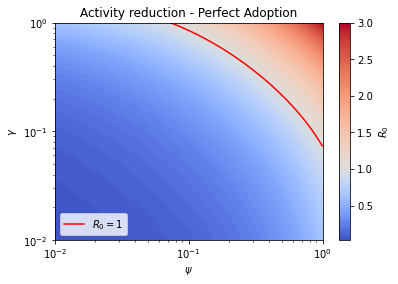

In [28]:
def two_significant_digits(x, pos):
    return "{:.1f}".format(x)

fig, ax = plt.subplots()
contour_levels = np.linspace(Erri.min(), Erri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax.contourf(pis, gam, Erri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

# Plot contour lines
contour = ax.contour(pis, gam, Erri, colors="red", levels=[1])

# Add color bar
#plt.colorbar(plot_surface, label=r"$R_0$")

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1$")
ax.legend(loc="lower left")

# Label the axes
ax.set_xlabel(r"$\psi$")
ax.set_ylabel(r"$\gamma$")
ax.set_title("Activity reduction - Perfect Adoption")
ax.set_xscale("log")
ax.set_yscale("log")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_act_perfadp_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

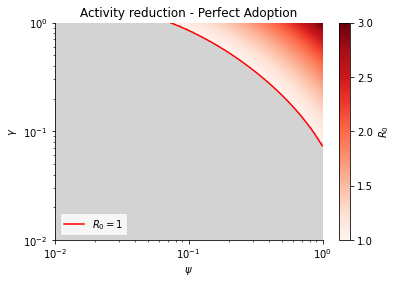

In [53]:
def two_significant_digits(x, pos):
    return "{:.1f}".format(x)

fig, ax = plt.subplots()
contour_levels = np.linspace(1, np.nanmax(Erri_n), 100)
ax.set_facecolor("lightgrey")

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
#norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax.contourf(pis, gam, Erri_n, cmap="Reds",  levels = contour_levels, origin = "upper")


midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

# Plot contour lines
contour = ax.contour(pis, gam, Erri, colors="red", levels=[1])

# Add color bar
#plt.colorbar(plot_surface, label=r"$R_0$")

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(1, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(1, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1$")
ax.legend(loc="lower left")

# Label the axes
ax.set_xlabel(r"$\psi$")
ax.set_ylabel(r"$\gamma$")
ax.set_title("Activity reduction - Perfect Adoption")
ax.set_xscale("log")
ax.set_yscale("log")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_act_perfadp_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

## imperfect adoption 
#### p = 0.8 , w = 0.75

In [3]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 3 * lam_t

pis = np.linspace(0.01, 1, 100)
gam = np.linspace(0.01, 1, 100)
iErri = np.zeros((len(pis), len(gam)))

for i, pissi in enumerate(pis):
    for j, gammi in enumerate(gam):
        iErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, pissi, 0.8, gammi, 0.75)[0]
iErri_n = np.copy(iErri)
iErri_n[iErri_n<1] = np.nan
print(iErri_n)
print(iErri)

[[       nan        nan        nan ... 1.45629666 1.46287134 1.46943167]
 [       nan        nan        nan ... 1.47887913 1.48552638 1.49215898]
 [       nan        nan        nan ... 1.50111043 1.50782914 1.51453288]
 ...
 [1.5898271  1.60919961 1.62834188 ... 2.9534997  2.96472867 2.97592471]
 [1.5973027  1.6167416  1.63594943 ... 2.96548554 2.97674993 2.98798125]
 [1.60475983 1.62426482 1.64353793 ... 2.97743386 2.98873353 3.        ]]
[[0.69517022 0.70547791 0.71567595 ... 1.45629666 1.46287134 1.46943167]
 [0.70812368 0.71858003 0.7289246  ... 1.47887913 1.48552638 1.49215898]
 [0.7208884  0.73149071 0.74197917 ... 1.50111043 1.50782914 1.51453288]
 ...
 [1.5898271  1.60919961 1.62834188 ... 2.9534997  2.96472867 2.97592471]
 [1.5973027  1.6167416  1.63594943 ... 2.96548554 2.97674993 2.98798125]
 [1.60475983 1.62426482 1.64353793 ... 2.97743386 2.98873353 3.        ]]


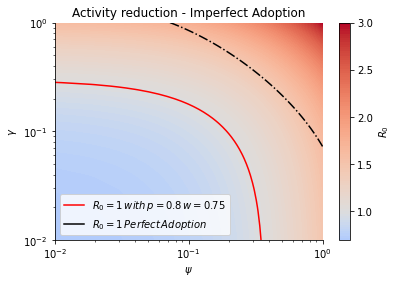

In [6]:
fig, ax = plt.subplots()
contour_levels = np.linspace(iErri.min(), iErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax.contourf(pis, gam, iErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

# Plot contour lines
contour = ax.contour(pis, gam, iErri, colors="red", levels=[1])
contour2 = ax.contour(pis, gam, Erri, colors="black", linestyles = "-." ,levels=[1])

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1\, with \, p =0.8 \, w =0.75$")
ax.plot(0, 0, color="black", label=r"$R_0 = 1\,Perfect\,Adoption$")
ax.legend(loc="lower left")

# Label the axes
ax.set_xlabel(r"$\psi$")
ax.set_ylabel(r"$\gamma$")
ax.set_title("Activity reduction - Imperfect Adoption")
ax.set_xscale("log")
ax.set_yscale("log")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_act_imperfadp_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 


# Show the plot
plt.show()

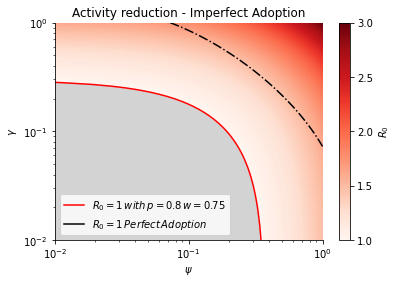

In [7]:
fig, ax = plt.subplots()
#contour_levels = np.linspace(iErri.min(), iErri.max(), 100)
contour_levels = np.linspace(1, np.nanmax(iErri_n), 100)
ax.set_facecolor("lightgrey")

midpoint = 1  # Center of the colormap
vmin, vmax = 1, 3  # Min and max values of the colormap

plot_surface = ax.contourf(pis, gam, iErri, cmap="Reds",  levels = contour_levels)


midpoint = 1  # Center of the colormap
vmin, vmax = 1, 3  # Min and max values of the colormap

# Plot contour lines
contour = ax.contour(pis, gam, iErri, colors="red", levels=[1])
contour2 = ax.contour(pis, gam, Erri, colors="black", linestyles = "-." ,levels=[1])

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1\, with \, p =0.8 \, w =0.75$")
ax.plot(0, 0, color="black", label=r"$R_0 = 1\,Perfect\,Adoption$")
ax.legend(loc="lower left")

# Label the axes
ax.set_xlabel(r"$\psi$")
ax.set_ylabel(r"$\gamma$")
ax.set_title("Activity reduction - Imperfect Adoption")
ax.set_xscale("log")
ax.set_yscale("log")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_act_imperfadp_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 


# Show the plot
plt.show()

## Phase space w vs p
#### with gamma = 0.1 and psi = 0.1

In [8]:
#Lo faccio diverso perché voglio sempre che l'upper limit sia per R0 = 3
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 3 * lam_t

wu = np.linspace(0.01, 1, 100)
pi = np.linspace(0.01, 1, 100)
sErri = np.zeros((len(pis), len(gam)))

for i, wui in enumerate(wu):
    for j, pii in enumerate(pi):
        sErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0.1, pii, 0.1, wui)[0]
sErri_n = np.copy(sErri)
sErri_n[sErri_n<1] = np.nan
print(sErri_n)
print(sErri)

[[2.973      2.95947604 2.94590373 ... 1.17475731 1.14163445 1.10735861]
 [2.95947604 2.946      2.93247582 ... 1.16796133 1.13496366 1.10081668]
 [2.94590373 2.93247582 2.919      ... 1.16115047 1.12827874 1.09426138]
 ...
 [1.17475731 1.16796133 1.16115047 ...        nan        nan        nan]
 [1.14163445 1.13496366 1.12827874 ...        nan        nan        nan]
 [1.10735861 1.10081668 1.09426138 ...        nan        nan        nan]]
[[2.973      2.95947604 2.94590373 ... 1.17475731 1.14163445 1.10735861]
 [2.95947604 2.946      2.93247582 ... 1.16796133 1.13496366 1.10081668]
 [2.94590373 2.93247582 2.919      ... 1.16115047 1.12827874 1.09426138]
 ...
 [1.17475731 1.16796133 1.16115047 ... 0.354      0.34029171 0.32613134]
 [1.14163445 1.13496366 1.12827874 ... 0.34029171 0.327      0.31327375]
 [1.10735861 1.10081668 1.09426138 ... 0.32613134 0.31327375 0.3       ]]


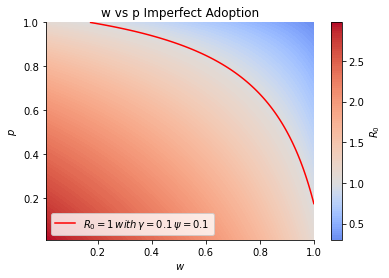

In [47]:
fig, ax = plt.subplots()
contour_levels = np.linspace(sErri.min(), sErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax.contourf(wu, pi, sErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax.contour(wu, pi, sErri, colors="red", levels=[1])

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1\,with\,\gamma = 0.1\, \psi = 0.1 $")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax.legend(loc="lower left")

# Label the axes
ax.set_xlabel(r"$w$")
ax.set_ylabel(r"$p$")
ax.set_title("w vs p Imperfect Adoption")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim(wu.min(), wu.max())  # Set x-axis limits
ax.set_ylim(pi.min(), pi.max())  # Set y-axis limits
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_act_wvsp_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

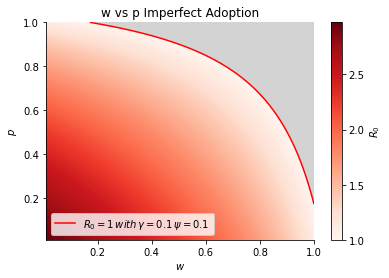

In [9]:
fig, ax = plt.subplots()

contour_levels = np.linspace(1, np.nanmax(sErri_n), 100)
ax.set_facecolor("lightgrey")

plot_surface = ax.contourf(wu, pi, sErri, cmap="Reds", levels = contour_levels)


# Plot contour lines
contour = ax.contour(wu, pi, sErri, colors="red", levels=[1])

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(1, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(1, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1\,with\,\gamma = 0.1\, \psi = 0.1 $")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax.legend(loc="lower left")

# Label the axes
ax.set_xlabel(r"$w$")
ax.set_ylabel(r"$p$")
ax.set_title("w vs p Imperfect Adoption")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim(wu.min(), wu.max())  # Set x-axis limits
ax.set_ylim(pi.min(), pi.max())  # Set y-axis limits
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_act_wvsp_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

In [49]:
#Lo faccio diverso perché voglio sempre che l'upper limit sia per R0 = 3
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 3 * lam_t

wu = np.linspace(0.01, 1, 100)
pi = np.linspace(0.01, 1, 100)
sErri = np.zeros((len(pis), len(gam)))

for i, wui in enumerate(wu):
    for j, pii in enumerate(pi):
        sErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0.8, pii, 0.1, wui)[0]
sErri_n = np.copy(sErri)
sErri_n[sErri_n<1] = np.nan
print(sErri_n)
print(sErri)

[[2.98348562 2.98049266 2.97749735 ... 2.68110275 2.67784395 2.67458191]
 [2.96992455 2.96694218 2.96395748 ... 2.66862366 2.66537665 2.66212642]
 [2.95631496 2.95334322 2.95036917 ... 2.65610105 2.65286589 2.64962752]
 ...
 [1.18003293 1.17852651 1.17701937 ... 1.0301687  1.02857942 1.02698912]
 [1.1468132  1.14533441 1.14385494 ...        nan        nan        nan]
 [1.11243768 1.11098733 1.10953633 ...        nan        nan        nan]]
[[2.98348562 2.98049266 2.97749735 ... 2.68110275 2.67784395 2.67458191]
 [2.96992455 2.96694218 2.96395748 ... 2.66862366 2.66537665 2.66212642]
 [2.95631496 2.95334322 2.95036917 ... 2.65610105 2.65286589 2.64962752]
 ...
 [1.18003293 1.17852651 1.17701937 ... 1.0301687  1.02857942 1.02698912]
 [1.1468132  1.14533441 1.14385494 ... 0.99981393 0.99825635 0.99669779]
 [1.11243768 1.11098733 1.10953633 ... 0.96839007 0.96686518 0.96533936]]


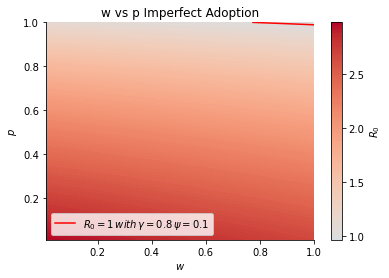

In [50]:
fig, ax = plt.subplots()
contour_levels = np.linspace(sErri.min(), sErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax.contourf(wu, pi, sErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax.contour(wu, pi, sErri, colors="red", levels=[1])

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1\,with\,\gamma = 0.8\, \psi = 0.1 $")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax.legend(loc="lower left")

# Label the axes
ax.set_xlabel(r"$w$")
ax.set_ylabel(r"$p$")
ax.set_title("w vs p Imperfect Adoption")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim(wu.min(), wu.max())  # Set x-axis limits
ax.set_ylim(pi.min(), pi.max())  # Set y-axis limits
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_act_wvsp_phase_space.png"
# Save the figure with specified DPI
#plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

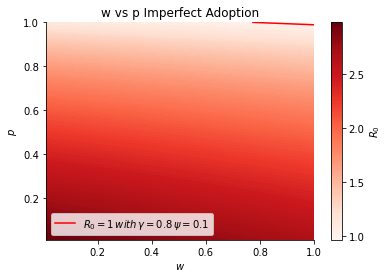

In [51]:
fig, ax = plt.subplots()

contour_levels = np.linspace(1, np.nanmax(sErri_n), 100)
ax.set_facecolor("lightgrey")

contour_levels = np.linspace(sErri.min(), sErri.max(), 100)



plot_surface = ax.contourf(wu, pi, sErri, cmap="Reds", levels = contour_levels)


# Plot contour lines
contour = ax.contour(wu, pi, sErri, colors="red", levels=[1])

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1\,with\,\gamma = 0.8\, \psi = 0.1 $")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax.legend(loc="lower left")

# Label the axes
ax.set_xlabel(r"$w$")
ax.set_ylabel(r"$p$")
ax.set_title("w vs p Imperfect Adoption")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim(wu.min(), wu.max())  # Set x-axis limits
ax.set_ylim(pi.min(), pi.max())  # Set y-axis limits
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_act_wvsp_phase_space.png"
# Save the figure with specified DPI
#plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()